In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import font_manager as fm
from pathlib import Path
from scipy.stats import boxcox
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
base_dir = Path(os.getenv("BASE_DIRECTORY"))
font_path = base_dir / "NotoSerifGujarati-Black.ttf"
guj_fonts = fm.FontProperties(fname=font_path)

In [3]:
# Load the data (Replace 'commodities_price_data.csv' with your file path)
file_path = base_dir / "data/commodities/commodities_price_data.csv"
data = pd.read_csv(file_path, parse_dates=['Date'], date_format='%d/%m/%Y')

# Display the first few rows to confirm the structure
# print("Dataset preview:")
print(data.head())
products = data['Item Name'].unique()
print(products)

commodity_name = 'કપાસ બી. ટી.'
commodity_data = data[data['Item Name'] == commodity_name]
# print(commodity_data['Date'])
size_commodity_data = commodity_data.shape[0]
print(size_commodity_data)

         Date      Item Name  Low Price  Average Price  High Price
0  28-10-2024   કપાસ બી. ટી.       1001           1481        1546
1  28-10-2024     મગફળી જીણી        711           1081        1166
2  28-10-2024  સિંગદાણા જાડા       1051           1141        1250
3  28-10-2024    સિંગ ફાડીયા        745           1141        1250
4  28-10-2024  એરંડા / એરંડી       1081           1236        1236
['કપાસ બી. ટી.' 'મગફળી જીણી' 'સિંગદાણા જાડા' 'સિંગ ફાડીયા' 'એરંડા / એરંડી'
 'જીરૂ' 'ડુંગળી લાલ' 'મગફળી જાડી' 'મગફળી 66' 'ગોગળી' 'ઘઉં લોકવન'
 'ઘઉં ટુકડા' 'તલ કાળા' 'ધાણા' 'લસણ સુકું' 'અડદ' 'તુવેર' 'મેથી' 'ગુવાર બી'
 'સફેદ ચણા' 'તલ - તલી' 'ધાણી' 'બાજરો' 'જુવાર' 'મકાઇ' 'મગ' 'ચણા' 'વાલ'
 'ચોળા / ચોળી' 'સોયાબીન' 'વટાણા' 'રાય' 'સુરજમુખી' 'ક્લંજી' 'વરીયાળી'
 'રાયડો' 'સુવાદાણા' 'કાંગ' 'અજમાં' 'મગફળી નવી' 'ઇસબગુલ' 'કળથી'
 'મરચા સૂકા પટ્ટો' 'મઠ' 'મરચા' 'કારીજીરી' 'ડુંગળી સફેદ' 'રાજગરો' 'અરીઠા'
 'તલ લાલ' 'નવા ધાણા' 'રજકાનું બી' 'નવી ધાણી' 'નવું લસણ' 'નવું જીરૂ'
 'વાલ પાપડી' 'નવા ચણા' 'ઘઉં નવા']
90


C:\Users\ladan\AppData\Local\Temp\ipykernel_5948\2596636206.py:31: UserWarning: Glyph 2709 (\N{GUJARATI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ladan\AppData\Local\Temp\ipykernel_5948\2596636206.py:31: UserWarning: Matplotlib currently does not support Gujarati natively.
  plt.tight_layout()
C:\Users\ladan\AppData\Local\Temp\ipykernel_5948\2596636206.py:31: UserWarning: Glyph 2730 (\N{GUJARATI LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ladan\AppData\Local\Temp\ipykernel_5948\2596636206.py:31: UserWarning: Glyph 2750 (\N{GUJARATI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ladan\AppData\Local\Temp\ipykernel_5948\2596636206.py:31: UserWarning: Glyph 2744 (\N{GUJARATI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ladan\AppData\Local\Temp\ipykernel_5948\2596636206.py:31: UserWarning: Glyph 2732 (\N{GUJARATI LETTER BA}) missing from font(s) DejaVu Sans.
  pl

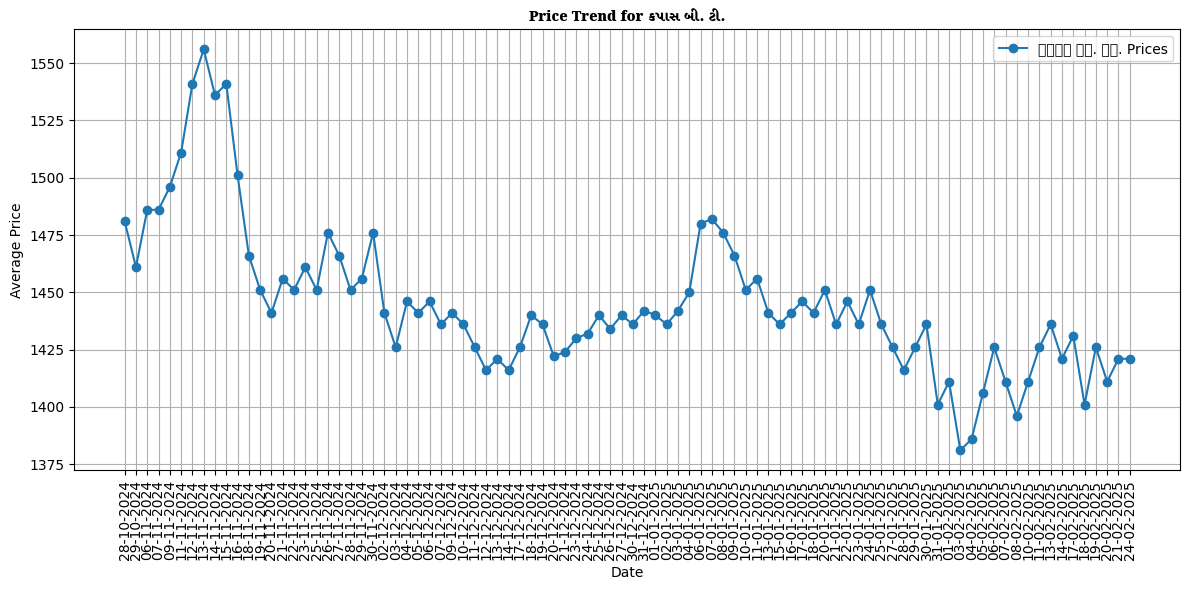

In [4]:
# Check if any data exists for the selected commodity
if commodity_data.empty:
  print(f"No data found for the commodity: {commodity_name}")

else:
  # Extract the 'Average Price' column for the selected commodity
  price_data = commodity_data['Average Price']
  # price_data.index = pd.to_datetime(price_data.index, format='%d-%m-%Y')
  # Get the last date in the dataset
  # latest_date = price_data.index.max()
  #print(latest_date)

  # Calculate the start date for the last 3 months
  # three_months_ago = latest_date - pd.DateOffset(months=3)
  #print(three_months_ago)

  # Filter the data for plotting
  # filtered_data = price_data[price_data.index >= three_months_ago]
  #print(filtered_data)


  # Plot the raw price data for the selected commodity
  plt.figure(figsize=(12, 6))
  plt.plot(commodity_data['Date'], price_data, label=f'{commodity_name} Prices', marker='o', linestyle='-')
  plt.title(f'Price Trend for {commodity_name}', fontproperties=guj_fonts)
  plt.xlabel('Date')
  plt.ylabel('Average Price')
  plt.xticks(rotation=90)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

In [5]:
transformed, lam = boxcox(price_data)
print(np.unique(transformed))  # Should have multiple unique values


[0.07087429]


In [6]:
print(price_data.describe())  # Check min, max, mean, std


count      90.000000
mean     1445.100000
std        32.195348
min      1381.000000
25%      1426.000000
50%      1440.000000
75%      1454.750000
max      1556.000000
Name: Average Price, dtype: float64


In [7]:
from scipy.stats import skew

variance_ratio = price_data.std() / price_data.mean()
print(variance_ratio)
skewness = skew(price_data)
print(skewness)

if variance_ratio > 0.1 and skewness > 0.5:
    apply_boxcox = True
else:
    apply_boxcox = False

print(apply_boxcox)

0.022278976027787802
1.2433421969256337
False


In [8]:
# Step 1: Stationarity Check

def check_stationarity(series):
    if len(series) == (size_commodity_data // 2)+1:
        return True
    result = adfuller(series)
    print("\nADF Test Results:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value:.4f}")
    if result[1] < 0.05:
        print("The series is stationary (no further differencing needed).")
        return True
    else:
        print("The series is not stationary (differencing is required).")
        return False


Checking stationarity for the raw price data:

ADF Test Results:
ADF Statistic: -2.0266
p-value: 0.2750
Critical Value 1%: -3.5069
Critical Value 5%: -2.8950
Critical Value 10%: -2.5846
The series is not stationary (differencing is required).

ADF Test Results:
ADF Statistic: -5.9095
p-value: 0.0000
Critical Value 1%: -3.5088
Critical Value 5%: -2.8958
Critical Value 10%: -2.5850
The series is stationary (no further differencing needed).
Data is stationary with d=1.

Checking stationarity for the differenced data:

ADF Test Results:
ADF Statistic: -5.9095
p-value: 0.0000
Critical Value 1%: -3.5088
Critical Value 5%: -2.8958
Critical Value 10%: -2.5850
The series is stationary (no further differencing needed).


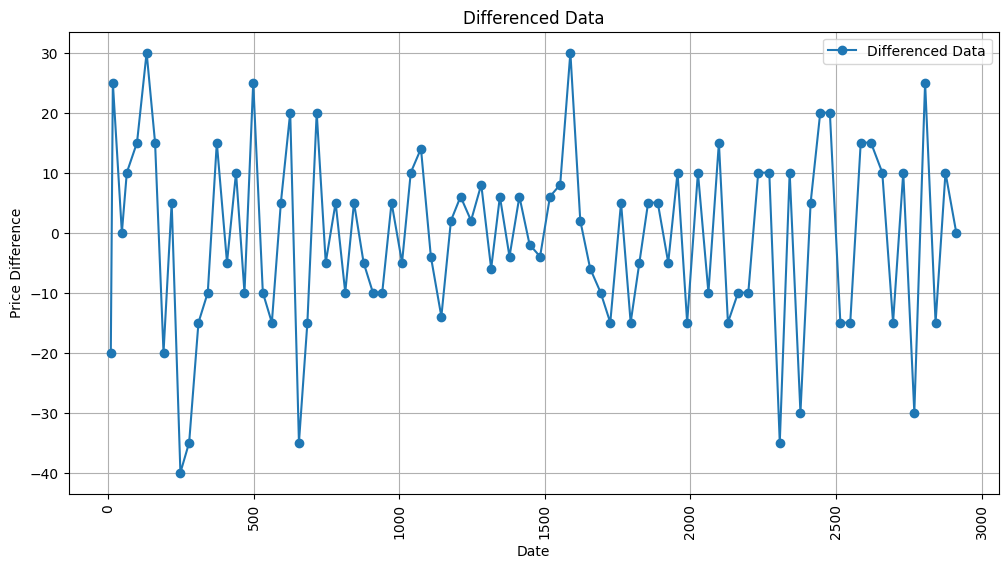

In [10]:
# Step 2: Differencing (if necessary)
print("Checking stationarity for the raw price data:")
d = 0
price_diff = price_data
# apply_boxcox = True
if apply_boxcox:
  price_diff, lam = boxcox(price_diff)
  price_diff = pd.Series(price_diff)
  
  

while True:
  if check_stationarity(price_diff):
    # price_diff = price_data
    print(f"Data is stationary with d={d}.")
    break
  else:
    price_diff = price_diff.diff().dropna()
    d += 1
# if check_stationarity(price_data):
#   price_diff = price_data
# else:
#   price_diff = price_data.diff().dropna()  # Apply differencing to make the series stationary

print("\nChecking stationarity for the differenced data:")
check_stationarity(price_diff)
# print(d)

# filtered_price_diff = price_diff[price_diff.index >= three_months_ago]  # For differenced data

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(price_diff, label='Differenced Data', marker='o', linestyle='-')
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

Significant spikes in ACF (q): 4 at lags [3 5 6 8]
Significant spikes in PACF (p): 6 at lags [ 3  5  6  8 14 17]


<Figure size 1200x600 with 0 Axes>

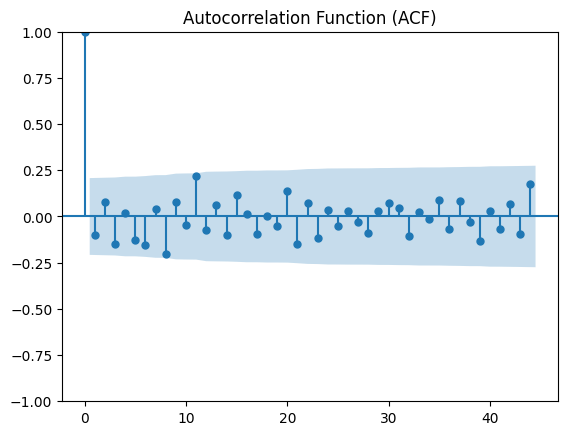

<Figure size 1200x600 with 0 Axes>

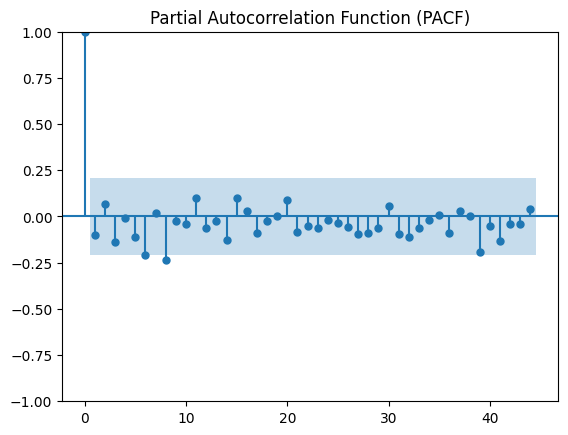

In [11]:
# Step 3: Plot ACF and PACF

acf_values, acf_confint = acf(price_diff, alpha=0.05)
pacf_values, pacf_confint = pacf(price_diff, alpha=0.05)

# Function to count significant lags
def count_significant_spikes(values, confint):
    # The significant lags are those outside the confidence interval
    significant_lags = np.where(np.abs(values) > confint[:, 1])[0]
    return len(significant_lags), significant_lags

# Count significant spikes for ACF (q)
q, significant_acf_lags = count_significant_spikes(acf_values, acf_confint)

# Count significant spikes for PACF (p)
p, significant_pacf_lags = count_significant_spikes(pacf_values, pacf_confint)

print(f"Significant spikes in ACF (q): {q} at lags {significant_acf_lags}")
print(f"Significant spikes in PACF (p): {p} at lags {significant_pacf_lags}")

# ACF and PACF Plots
try:
    plt.figure(figsize=(12, 6))
    plot_acf(price_diff, lags=(size_commodity_data//2)-1, title="Autocorrelation Function (ACF)")
    plt.show()

    plt.figure(figsize=(12, 6))
    plot_pacf(price_diff, lags=(size_commodity_data//2)-1, title="Partial Autocorrelation Function (PACF)")
    plt.show()
   
except Exception as e:
    print(f"Can't plot the acf/pacf plots for {commodity_name} due to {e}")

# Explanation:
# - ACF (Autocorrelation Function): Measures the correlation between a series and its lagged values.
# - PACF (Partial Autocorrelation Function): Measures the correlation between a series and its lagged values,
#   removing the influence of intermediate lags.
# - Use these plots to decide on p (AR term) and q (MA term).

In [12]:
# Step 4: Fit the ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Choose p, d, q based on ACF and PACF (example values)
# p, d, q = 5, 0, 2  # Adjust based on ACF/PACF analysis
if p > 5:
    p = min(5, q)
if q > 5: 
    q = min(5, p)
if d > 3:
    d = 1

fit_successful = False

while not fit_successful and q >= 0:  # Loop until fitting is successful or q becomes negative
    try:
        print(f"\nFitting ARIMA model with order ({p}, {d}, {q})...")
        model = ARIMA(price_data, order=(p, d, q))
        results = model.fit()
        fit_successful = True  # If no error occurs, mark the fitting as successful
        print("ARIMA model fitted successfully!")
        
    except np.linalg.LinAlgError as err:
        print(f"Error encountered: {err}")
        if q > 0:  # Only reduce q if it's still above 0
            q -= 1
            print(f"Reducing q to {q} and trying again...")
        else:
            print("Unable to fit model after reducing q multiple times. Exiting loop.")
            break  # Break out of the loop if q is 0 or lower

# Explanation of results.summary():
# - Coefficients: Parameters of AR, I, and MA terms.
# - P-values: Check if terms are statistically significant (p < 0.05).
# - AIC/BIC: Lower values indicate a better fit.


Fitting ARIMA model with order (4, 1, 4)...


c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA model fitted successfully!


c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
# Step 5: Analyze Model Summary
print("\nARIMA Model Summary:")
print(results.summary())


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:          Average Price   No. Observations:                   90
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -358.777
Date:                Mon, 24 Feb 2025   AIC                            735.553
Time:                        21:42:58   BIC                            757.951
Sample:                             0   HQIC                           744.581
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1109      0.063     -1.772      0.076      -0.234       0.012
ar.L2          1.5239      0.071     21.555      0.000       1.385       1.662
ar.L3          0.0173      0.0

Overview of the Summary Output
Dep. Variable: The dependent variable is the time series being modeled, in this case, "Average Price."
No. Observations: The total number of observations in the dataset (87).
Model: The specified ARIMA model, in this case, ARIMA(8, 1, 3), meaning:

p => (number of autoregressive terms),

d => (degree of differencing),

q => (number of moving average terms).

Log Likelihood: A measure of the likelihood of the observed data given the model; higher values indicate a better fit.


Information Criteria
AIC (Akaike Information Criterion): 1159.521. Lower AIC values suggest a better fit of the model to the data, penalizing for the number of parameters.
BIC (Bayesian Information Criterion): 1188.973. Similar to AIC but includes a stronger penalty for the number of parameters.
HQIC (Hannan-Quinn Information Criterion): 1171.374. Another criterion used for model comparison, typically used when the sample size is small.


Coefficient Estimates
The table displays the estimated coefficients for the AR and MA terms, along with their standard errors, z-scores, p-values, and confidence intervals:
coef: Estimated coefficient for each term (e.g., ar.L1, ma.L1).
std err: Standard error of the coefficient estimate.
z: The z-score for the hypothesis test that the coefficient is zero.
P>|z|: The p-value associated with the z-score. A value less than 0.05 generally indicates statistical significance.
[0.025, 0.975]: The 95% confidence interval for the coefficient estimate.


Key Points from Coefficient Table
Significant Terms:
ar.L3 has a p-value of 0.028, indicating it is statistically significant.
ar.L5 has a p-value of 0.084, which is borderline significant.
Other coefficients have higher p-values, suggesting they are not statistically significant.

Variance Estimate
sigma2: The estimated variance of the residuals (errors) in the model (3.541e+04), along with its standard error and confidence interval.

Diagnostic Tests
Ljung-Box Test: A test for autocorrelation in the residuals.

Q: Test statistic (0.00), indicating no autocorrelation.
Prob(Q): Probability associated with the Q statistic (0.95), suggesting that we cannot reject the null hypothesis of no autocorrelation.
Jarque-Bera Test: A test for normality of the residuals.

Prob(JB): The probability value (0.01) indicates the residuals are not normally distributed.
Heteroskedasticity Test (H): Tests for changing variance in the residuals.

Prob(H): A p-value of 0.00 indicates the presence of heteroskedasticity.

In [15]:
# Step 6: In-sample Predictions
pred = results.get_prediction(start=0, end=len(price_data)-1)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

In [16]:
# Step 7: Forecast Future Prices
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


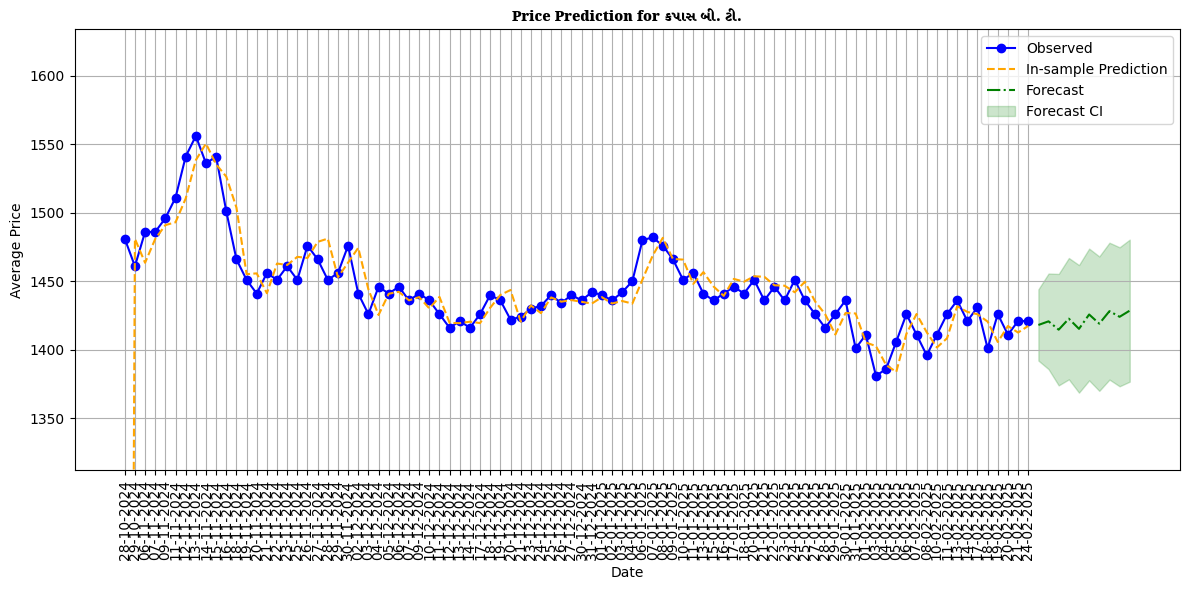

In [17]:
# Step 8: Plot the Results with Detailed Y-Axis (Zoomed-In)
plt.figure(figsize=(12, 6))

# Plot observed prices
plt.plot(commodity_data['Date'], price_data, label='Observed', marker='o', linestyle='-', color='blue')

# Plot in-sample predictions
plt.plot(commodity_data['Date'], pred_mean, label='In-sample Prediction', color='orange', linestyle='--')

# Plot forecasted prices
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green', linestyle='-.')

# Add confidence intervals for forecasts
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='green', alpha=0.2, label='Forecast CI')

# Adjust the y-axis range based on observed and forecasted prices
plt.ylim(price_data.min() * 0.95, price_data.max() * 1.05)

# Graph labels and legend
plt.title(f'Price Prediction for {commodity_name}', fontproperties=guj_fonts)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [20]:
from sklearn .metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print(mean_absolute_error(price_data, pred_mean))
print(mean_absolute_percentage_error(price_data, pred_mean))
print(mean_squared_error(price_data, pred_mean))

27.22981432012178
0.01855159332937937
24558.805214121952
